In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


## 데이터 둘러보기

In [2]:
import numpy as np
import pandas as pd

data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [3]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 피처 엔지니어링

In [9]:
print(train['datetime'][100]) # datetime의 100번째 원소
print(train['datetime'][100].split())
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[1])

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [10]:
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[0].split('-'))
print(train['datetime'][100].split()[0].split('-')[0])
print(train['datetime'][100].split()[0].split('-')[1])
print(train['datetime'][100].split()[0].split('-')[2])

2011-01-05
['2011', '01', '05']
2011
01
05


In [11]:
print(train['datetime'][100].split()[1])
print(train['datetime'][100].split()[1].split(':'))
print(train['datetime'][100].split()[1].split(':')[0])
print(train['datetime'][100].split()[1].split(':')[1])
print(train['datetime'][100].split()[1].split(':')[2])

09:00:00
['09', '00', '00']
09
00
00


In [12]:
# 기존 피처에서 날짜, 연, 월, 일, 시, 분, 초 피처를 생성(기존피처에서 파생된 피처 : '파생 피처' 혹은 '파생 변수'라 함)
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [13]:
from datetime import datetime # datetime 라이브러리 import
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
# 정수를 요일로 변환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()) 
# 문자열로 요일 변환(0은 월요일, 1은 화요일, 2는 수요일순으로 매핑 됨, 단 머신러닝을 훈련할 때는 피처 값을 숫자로 변경하면 안 됨 // 여기서는 그래프로 확인하려 하기 때문에 문자열로 변경함)
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [14]:
train['weekday'] = train['date'].apply(
lambda dateString:
    calendar.day_name[datetime.strptime(dateString,'%Y-%m-%d').weekday()]
)

In [15]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                        3: 'Light Snow, Rain, Thunderstrom',
                                        4: 'Heavy Rain, Thunderstrom, Snow, Fog'})

In [16]:
train.head() # 분석 결과 date 피처 삭제, month 피쳐 제거

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 데이터 시각화

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
# matplot이 그린 그래프를 주피터 노트북에서 바로 출력해줌(캐클 환경에서는 %matplot inline이 없어도 그래프를 보여주지만 matplot을 사용하는 경우 관습적으로 쓰는 경향이 있음)

## 분포도
#### 수치형 데이터의 집계 값을 나타내는 그래프이다. // 집계값은 총 개수나 비율등을 의미함
#### 이번장에서는 타깃값의 분포를 알면 훈련 시 타깃값을 그대로 사용할 지 변환해 사용할지 파악할 수 있기 때문

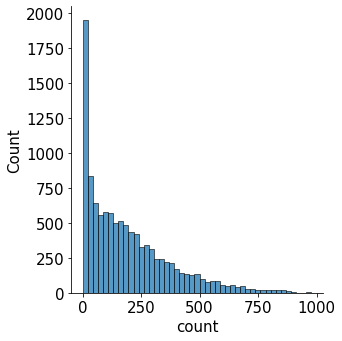

In [18]:
mpl.rc('font', size=15) # 폰트 크기를 15로 설정
sns.displot(train['count']); # 분포도 출력

#### x 축은 타깃값인 count를 나타내고, y축은 총 개수를 나타냄. 분포도를 보면 타깃값인 count가 0근처에 모여있음
#### 즉, 분포가 왼쪽으로 많이 편향되어있음 // 회귀 모델이 좋은 성능을 내려면 데이터가 정규 분포를 따라야함 // 현재 타깃값을 그대로 사용해 모델링 한다면 좋은 성능을 기대하기 어려움
#### 데이터 분포를 정규 분포에 가깝게 만들기 위해 가장 많이 사용하는 방법은 로그변환임, 로그변환은 count 분포와 같이 데이터가 왼쪽으로 편향되어 있을 때 사용함
#### 로그변환 방법 : 원하는 값에 로그를 취해주면 됨

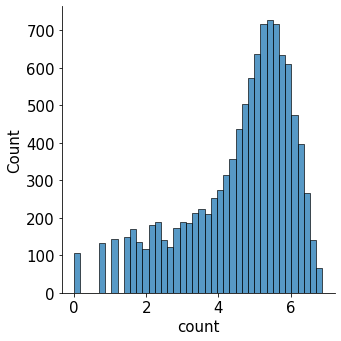

In [19]:
# count를 로그 변환한 값의 분포
sns.displot(np.log(train['count']));

# 변환 전보다 정규분포에 가까워짐 // 회귀모델의 성능 향상을 기대할 수 있음
# 피처를 바로 활용해 count를 예측하는 것보다 log(count)를 예측하는 편이 더 정확함 // 따라서 타깃값을 log(count)로 변환해 사용
# 다만, 마지막에 지수변환을 하여 실제 타깃값인 count로 복원해야 됨 // log(y)를 지수 변환하면 y가 됨 = y = e^log(y) // 성능 그래프는 194p참고

## 막대 그래프
#### 연도, 월, 일, 시, 분, 초별로 총 여섯가지 평균 대여 수량을 막대 그래프로 그리기 // 이 피처들은 범주형 데이터 임 // 각 범주형 데이터에 따라 평균 대여 수량이 어떻게 다른지 파악(중요 피처 확인)
#### 이럴때는 막대 그래프를 이용해서 확인

## 스텝 1 : m행 n열 Figure 준비하기
#### 첫 번째로 총 6개의 그래프(서브플롯)를 품느 3행 2열짜리 Figure를 준비

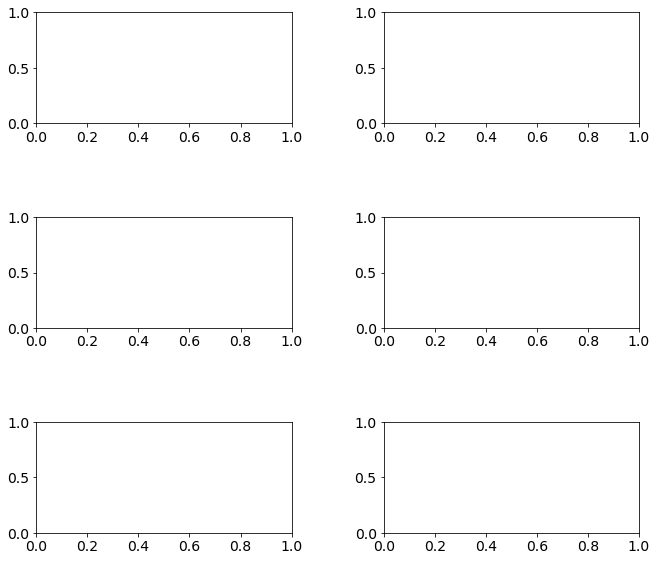

In [20]:
mpl.rc('font', size = 14) # 폰트 크기 설정 (이책의 196p ,195는 그래프를 그린 후 자세한 설명 확인)
mpl.rc('axes', titlesize = 15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 (1)
plt.tight_layout() # 그래프 사이에 여백 확보 (2)
figure.set_size_inches(10, 9) # 전체 Figure의 크기를 10x9인치로 설정 (3)
# train.head()

#### 코드 (1)은 matplotlib 라이브러리의 subplots() 함수 사용 예시임. // 한 화면에 여러 그래프를 동시에 그릴 때 사용
#### 파라미터를 두 개 받는데 nrows : 행의 개수, ncols : 열의 개수
#### (1)을 실행하면 3행 2열의 서브플롯(subplot) 전체가 figure 변수에 할당되며, 각각의 서브플롯 축 6개는 axes 변수에 할당 됨 // 위는 1까지만 실행해 figure를 출력 해본 모습임

In [21]:
# axes에는 어떤 객체가 할당 되어있는지 출력
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

### AxeSubplot 객체가 6개가 3행 2열로 구성된 배열이 출력 됨 // 이 배열을 입력으로 axes.shape을 실행하면(3,2)가 출력됨
### 출력 결과의 각 AxesSubplot 객체는 순서대로 서브플롯의 0행 0열, 0행 1열, 1행 0열, 1행 1열, 2의 0열 2의 1열 // ex) axes[0,0] : subplot의 0행 0열 축을 의미함

### 코드(2)의 plt.tight_layout()은 서브플롯 사이에 여백을 줘 간격을 넓이는 기능을 함

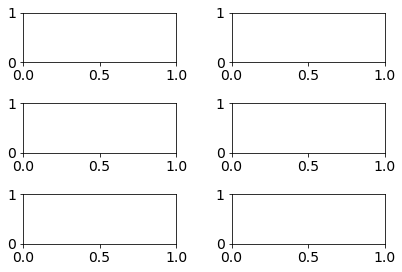

In [22]:
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout() # subplot 사이의 공간이 넓어짐

#### 코드(3)의 figure.set_size_inches(10,9)로는 Figure 크기를 지정함 // 서브플롯 하나의 크기가 아니라 서브플롯 6개를 합친 '전체' Figure 크기이며, 단위는 함수 이름에서 알수 있듯이 inch 임.
#### 첫 번째 파라미터로는 너비, 두 번째 파라미터로는 높이를 조절 함. 여기서 너비는 10 inch, 높이는 9 inch 임.

## 스텝 2 : 각 축에 서브플롯 할당
#### 이어서 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프를 스텝 1에서 준비한 Figure의 각 축에 할당
#### 막대 그래프 생성에는 seaborn의 barplot()함수를 이용했음. x 파라미터에 연도, 월, 일, 시간, 분, 초를 전달하고, y 파라미터에 대여 수량을 전달
#### data 파라미터에는 훈련 데이터를 DataFrame 형식으로 전달하면 됨
#### ax 파라미터에는 AxesSubplot 객체를 전달하면 됨 // 0행 0열 축부터 2행 1열의 축까지 순서대로 전달했음

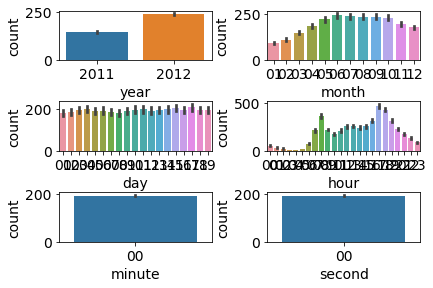

In [23]:
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout() # subplot 사이의 공간이 넓어짐

#각 축에 서브플롯 할당
sns.barplot(x='year', y='count',data=train, ax=axes[0,0])
sns.barplot(x='month', y='count',data=train, ax=axes[0,1])
sns.barplot(x='day', y='count',data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count',data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count',data=train, ax=axes[2,0])
sns.barplot(x='second', y='count',data=train, ax=axes[2,1]);

# 의도한 대로 잘 할당 되었지만, 각 서브플롯이 어떤 정보를 표현하는지가 한눈에 안들어오고, 어떤 서브플롯은 x축 라벨이 서로 겹치는 등 아쉬운 점이 있음

## 스텝 3 : (선택) 세부 설정
#### 아쉬움이 남는다면 다양한 형태로 세부 속성을 설정할 수 있음
#### 각 서브플롯에 제목 추가 및 x축 라벨이 겹치지 않게 개선

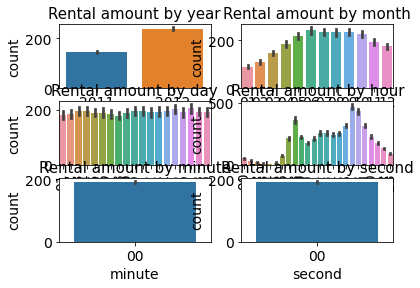

In [24]:
figure, axes = plt.subplots(nrows=3, ncols=2)

sns.barplot(x='year', y='count',data=train, ax=axes[0,0])
sns.barplot(x='month', y='count',data=train, ax=axes[0,1])
sns.barplot(x='day', y='count',data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count',data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count',data=train, ax=axes[2,0])
sns.barplot(x='second', y='count',data=train, ax=axes[2,1]);

# 먼저 각 축에 그려진 서브플롯에 제목 달아주기

axes[0, 0].set(title = 'Rental amount by year')
axes[0, 1].set(title = 'Rental amount by month')
axes[1, 0].set(title = 'Rental amount by day')
axes[1, 1].set(title = 'Rental amount by hour')
axes[2, 0].set(title = 'Rental amount by minute')
axes[2, 1].set(title = 'Rental amount by second')

# 이어서 1행의 두 서브플롯의 x 축 라벨들을 90도 회전

axes[1, 0].tick_params(axis = 'x', labelrotation=90)
axes[1, 1].tick_params(axis = 'x', labelrotation=90)

# 보다시피 axis 파라미터에 원하는 축을 명시하고 labelrotation 파라미터에 회전 각도를 입력하면 됨.
# axis의 값으로는 'x', 'y', 'both',를 지정 할 수 있으며, 기본값이 'both'이므로 생략하면 두축을 한꺼번에 회전 시킴

### 이상 세부설정을 마쳤음. 다음의 전체 코드를 실행하면 막대 그래프가 화면에 출력됨.

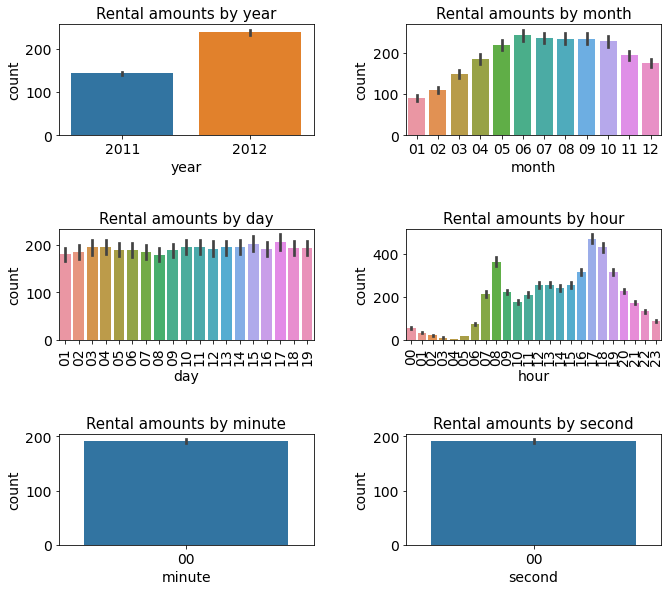

In [25]:
# 스텝 1 : m 행 n열 Figure 준비
mpl.rc('font', size = 14) #  폰트 크기 설정
mpl.rc('axes', titlesize = 15) # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows = 3, ncols = 2) # 3행 2열 Figure 생성
plt.tight_layout()
figure.set_size_inches(10,9)

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x = 'year', y = 'count', data=train, ax = axes[0,0])
sns.barplot(x = 'month', y = 'count', data=train, ax = axes[0,1])
sns.barplot(x = 'day', y = 'count', data=train, ax = axes[1,0])
sns.barplot(x = 'hour', y = 'count', data=train, ax = axes[1,1])
sns.barplot(x = 'minute', y = 'count', data=train, ax = axes[2,0])
sns.barplot(x = 'second', y = 'count', data=train, ax = axes[2,1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기

axes[0,0].set(title='Rental amounts by year')
axes[0,1].set(title='Rental amounts by month')
axes[1,0].set(title='Rental amounts by day')
axes[1,1].set(title='Rental amounts by hour')
axes[2,0].set(title='Rental amounts by minute')
axes[2,1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전

axes[1, 0].tick_params(axis = 'x', labelrotation=90)
axes[1, 1].tick_params(axis = 'x', labelrotation=90)

## 박스플롯
#### 범주형 데이터에 따른 수치형 데이터 정보를 나타내는 그래프이다. // 막대 그래프보다 더 많은 정보를 제공하는 특징이 있음
#### 여기서는 계절, 날씨, 공휴일, 근무일(범주형 데이터)별 대여 수량(수치형 데이터)을 박스 플롯으로 그려봄
#### 각 범주형 데이터에 따라 타깃값인 대여 수량이 어떻게 변하는지 알 수 있음

#### 이번에는 2행 2열 figure를 만들것이며, 코드는 막대 그래프 때와 같은 Figure 준비 -> 서브 플롯 할당 -> 세부 설정 순서로 작성

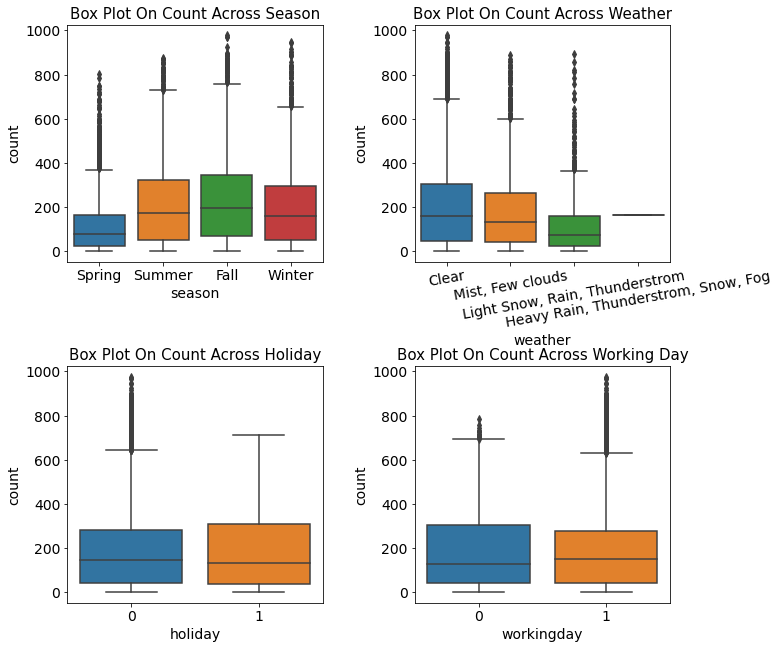

In [26]:
# 스텝 1  : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows = 2, ncols = 2) # 2행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10, 10) # 전체 Figure 크기를 10 x 10 inch로 설정

# 스텝 2 : 서브 플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯

sns.boxplot(x = 'season', y = 'count', data=train, ax=axes[0,0])
sns.boxplot(x = 'weather', y = 'count', data=train, ax=axes[0,1])
sns.boxplot(x = 'holiday', y = 'count', data=train, ax=axes[1,0])
sns.boxplot(x = 'workingday', y = 'count', data=train, ax=axes[1,1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0,0].set(title='Box Plot On Count Across Season')
axes[0,1].set(title='Box Plot On Count Across Weather')
axes[1,0].set(title='Box Plot On Count Across Holiday')
axes[1,1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0,1].tick_params(axis = 'x', labelrotation=10) # 10도 회전

## 포인트 플롯
#### 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여수량을 포인트플롯(pointplot)으로 그리기
#### 포인트 플롯은 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 점과 선으로 표시함
#### 막대 그래프와 동일한 정보를 제공하지만, 한 화면에 여러 그래프를 그려 서로 비교해보기에 더 적합함

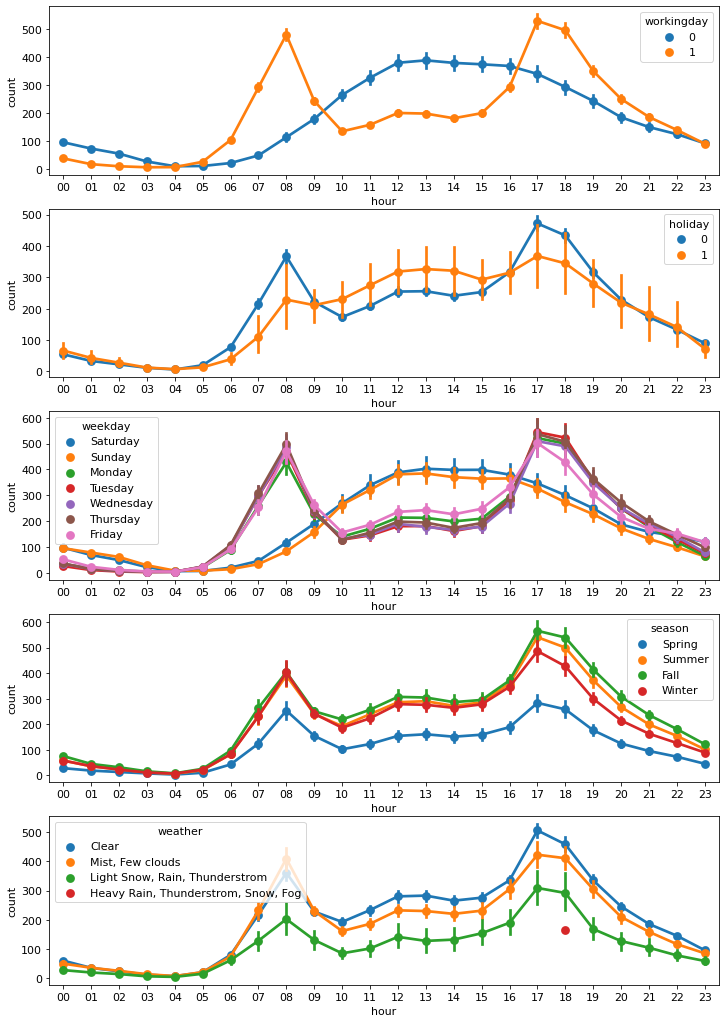

In [27]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size = 11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트 플롯
sns.pointplot(x='hour' ,y='count' ,data=train, hue='workingday' , ax=axes[0])
sns.pointplot(x='hour' ,y='count' ,data=train, hue='holiday' , ax=axes[1])
sns.pointplot(x='hour' ,y='count' ,data=train, hue='weekday' , ax=axes[2])
sns.pointplot(x='hour' ,y='count' ,data=train, hue='season' , ax=axes[3])
sns.pointplot(x='hour' ,y='count' ,data=train, hue='weather' , ax=axes[4]);

#### 분석 결과 weather의 4번의 이상치를 제거하는게 성능이 더 좋았음 // weather == 4 제거

## 회귀선을 포함한 산점도 그래프
#### 수치형 데이터인 온도, 체감온도, 풍속, 습도별 대여 수량을 '회귀선을 포함한 산점도 그래프'로 그려봄
#### 회귀선이 포함한 산점도 그래프는 수치형 데이터 간 상관관계를 파악하는데 사용함

<AxesSubplot:xlabel='humidity', ylabel='count'>

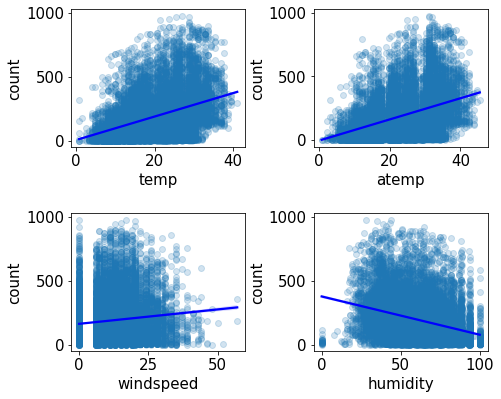

In [28]:
# 아래 그래프는 seaborn의 regplot() 함수로 그릴 수 있음
mpl.rc('font',size = 15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7,6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0,0],
           scatter_kws={'alpha' : 0.2}, line_kws={'color' : 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0,1],
           scatter_kws={'alpha' : 0.2}, line_kws={'color' : 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1,0],
           scatter_kws={'alpha' : 0.2}, line_kws={'color' : 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1,1],
           scatter_kws={'alpha' : 0.2}, line_kws={'color' : 'blue'})

#### windspeed 회귀선을 보면 바람이 강할수록 많이 대여 수량이 많음 // 바람이 약할 수록 대여가 많을 것으로 예상 했음
#### 회귀선이 예상과 다르게 그려진 이유는 windspeed 피처의 결측값이 많기 때문임.
#### 자세히 보면 풍속이 0인 데이터가 많음. 실제로 풍속이 0이 아니라 관측치가 없거나 오류로 인해 0으로 기록되었을 가능성이 높음
#### 결측값이 많아서 그래프만으로는 풍속과 대여 수량의 상관관계를 파악하기 힘듬. 결측값이 많은 데이터는 적절히 처리해야 함. // windspeed 피처 제거

## 히트맵
#### temp, atemp, humidity, windspped, count는 수치형 데이터임, 수치형 데이터끼리 어떤 상관 관계가 있는지 알아보려함.
#### corr()함수는 DataFrame 내의 피처 간 상관계수를 반환함

In [29]:
train[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


#### 하지만 조합이 많아 어느 피처들의 관계가 깊은지 한눈에 들어오지 않음.
#### 히트맵(heatmap)이 필요한 순간임
#### 히트맵은 데이터 간 관계를 색상으로 표현하여, 여러 데이터를 한눈에 비교하기에 좋음
#### 히트맵은 seaborn의 heatmap()함수로 그릴 수 있음

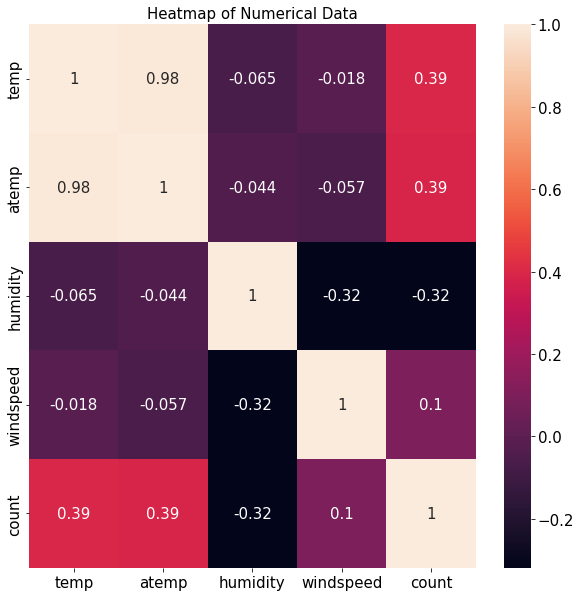

In [30]:
# 피처간의 상관관계 매트릭스
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

#### corr() 함수로 구한 상관관계 매트릭스 corrMat를 heatmap()함수에 인수로 넣어주면 됨. // 이때 annot=Ture로 설정하면 상관계수가 숫자로 표시됨

### 히트맵 해석
#### 온도(temp)와 대여수량(count)간 상관계수는 0.39임. 양의 상관관계를 보임(온도가 높을수록 대여 수량이 많다는 뜻)
#### 반면, 습도(humidity)와 대여 수량은 음수이니 습도가 '낮을수록' 대여 수량이 많다는 뜻 // 앞서 산점도 그래프에서 분석한 내용과 동일함
#### 풍속과 대여수량의 상관계수는 0.1임, 상관관계가 매우 약함 // windspeed 피처는 대여 수량 예측에 별 도움을 주지 못할 것 같음. // 성능을 높이기 위해 모델링 시 windspeed 피처 제거
#### 참고로 바로 앞의 '회귀선을 포함한 산점도 그래프' 절에서는 결측값이 많다는 이유로 같은 결로에 도달했었음

## 분석 정리 및 모델링 전략

### 분석 정리
#### 지금까지 다양한 측면에서 데이터를 살펴보았음. 분석 과정에서 파악한 주요 내용을 정리

#### 1. 타깃값 변환 : 분포도 확인 결과 타깃값인 count가 0근처로 치우쳐 있으므로 로그변환하여 정규분포에 가깝게 만들어야 됨. 타깃값을 count가 아닌 log(count)로 변환해 사용 할 것이므로,
#### 마지막에 다시 지수변환해 count로 복원해야 됨.

#### 2. 파생 피처 추가 : datetime 피처는 여러 가지 정보의 혼합체이므로 각각을 분리해 year, month, day, hour, minute, second 피처를 생성할 수 있음.
#### 3. 파생 피처 추가 : datetime에 숨어 있는 또 다른 정보인 요일(weekday) 피처를 추가.
#### 4. 피처 제거 : 테스트 데이터에는 없는 피처는 훈련에 사용해도 큰 의미가 없음. 따라서 훈련 데이터에만 있는 casual과 registered 피처는 제거.
#### 5. 피처 제거 : datetime 피처는 인덱스 역할만 하므로 타깃값 예측에 아무런 도움이 되지 않음
#### 6. 피처 제거 : date 피처가 제공하는 정보는 year, month, day 피처에 담겨있음
#### 7. 피처 제거 : month는 season 피처의 세부 분류로 볼 수 있음. 데이터가 지나치게 세분화 되어있으면 분류별 데이터 수가 적어서 오히려 학습에 방해가 되기도 함
#### 8. 피처 제거 : 막대 그래프 확인 결과 파생 피처인 day는 분변력이 없음
#### 9. 피처 제거 : 막대 그래프 확인 결과 파생 피처인 minute와 second에는 아무런 정보가 담겨있지 않음
#### 10. 이상치 제거 : 포인트 플롯 확인 결과 weather가 4인 데이터는 이상치임.
#### 11. 피치 제거 : 산점도 그래프와 히트맵 확인 결과 windspeed피처에는 결측값이 많고 대여 수량과의 상관관계는 매우 약함

## 모델링 전략
#### 경진대회에서 우수한 성적을 거두려면 본인만의 최적화된 모델을 구상해야 됨.
##### (여기서는 익숙해지기 위해 사이킷런이 제공하는 기본적인 모델만 사용함, 차후 자신이 만든 모델이 최소한 기본 모델들 보다는 우수해야 대회에 참여한 의의가 있을테니 이번에는 익숙해지는데 중점을 둠)
#### 베이스라인 모델 : 가장 기본적인 회귀 모델인 LinearRegression 채택
#### 성능 개선 : 릿지, 라쏘, 랜덤 포레스트 회귀 모델
#### 피처 엔지니어링 : 앞으 분석 수준에서 모든 모델에서 동일하게 수행
#### 하이퍼파라미터 최적화 : 그리드서치
#### 기타 : 타깃값이 count가 아닌 log(count)임

#### //베이스라인 모델과 성능 개선 절들은 본 경진대회에서 추천수가 가장 많은 다음 노트북을 리팩터링하여 작성함
##### 209,210p 참고

## 베이스라인 모델
#### 이번 절에서는 앞 절에서 추린 피처들을 활용해 베이스라인 모델을 훈련하고 결과를 제출할 예정
#### 베이스라인 모델이란 뼈대가 되는 가장 기본적인 모델을 의미함.(여기서는 베이스라인 모델에서 출발해 성능을 점차 향상시키는 방향으로 모델링 할 것임
#### 경진대회에 참가하다 보면 다른 참가자들이 베이스라인 모델을 공유 할 것임. 공유된 모델을 사용해도 되고, 직접 자신만의 모델을 만들어도 됨
#### 이번 장에서는 사이킷런이 제공하는 기본 선형 회귀 모델을 베이스라인으로 사용 할 것임. 전체 프로세스는 다음과 같음
### 데이터 불러오기 -> (기본적인)피처 엔지니어링 -> 평가지표 계산 함수 작성 -> 모델 훈련 -> 성능 검증 -> 제출

In [31]:
import pandas as pd
# 데이터 경로

data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

## 피처 엔지니어링
#### 데이터를 변환하는 작업// 보통은 훈련 데이터와 테스트 데이터에 공통으로 반영해야 하기 때문에, 피처 엔지니어링 전에 두 데이터를 합쳤다가 다 끝나면 도로 나눔
##### 데이터를 합치기 전에 훈련 데이터에서 이상치 하나를 제거

### 이상치 제거
#### 앞서 포인트 플롯에서 확인 한 결과 훈련 데이터에서 weather가 4인 데이터(폭우 폭설이 내리는 날 저녁 6시에 대여)는 이상치였음. // 해당피처 제거

In [32]:
# 훈련 데이터에서 weater가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

## 데이터 합치기 
#### 훈련 데이터와 테스트 데이터에 같은 피쳐 엔지니어링을 적용하기 위해 두 데이터를 하나로 합침
#### 판다스의 concat()함수를 사용하면 축을 따라 DataFrame을 이어붙일 수 있음
#### 훈련 데아터는 10,886행, 테스트 데이터는 6,439행으로 구성되어 있음 합치면 17379행임.
#### 앞서 weather가 4인 데이터는 제거했으니(1개 있음), 최종적으로 17378행이 됨.

In [33]:
# 제대로 합쳐졌는지 확인
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


### 총 17378개의 행인데 인덱스가 6492까지 밖에 안보임(그림에서는 중간과정이 생략되어있고, 실제로는 0부터 10885까지 매기고, 다시 0부터 6,492까지 매긴 결과임(중간에 앞서 제거한 인덱스도 있음
### 원래 데이터의 인덱스를 무시하고 이어붙이려면 ignore_index = True를 전달하면 됨

In [34]:
all_data = pd.concat([train, test],ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


#### 인덱스가 0부터 17377까지 출력된것을 확인 할 수 있음
#### 테스트 데이터에 casual, registered 피처와 count 타깃값이 없으므로 NaN으로 표시된 것도 볼 수 있음.

## 파생 피처(변수) 추가
#### 이전에 다룬 피처 엔지니어링(파생 피처 추가)을 비슷한 방식으로 적용

In [35]:
from datetime import datetime

#날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x:x.split()[0])

#연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x:x.split()[0].split('-')[0])

#월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x:x.split()[0].split('-')[1])

#시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x:x.split()[1].split(':')[0])

#요일 피처 생성
all_data['weekday'] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

In [36]:
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,01,00,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,01,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,01,02,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,01,03,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,01,04,5


### 훈련 데이터는 매달 1일부터 19일까지의 기록이고, 테스트 데이터는 매달 20일부터 월말까지의 기록임
### 그러므로 대여 수량을 예측할 때 일(day) 피처는 사용 할 필요가 없음, minute와 second 피처도 모든 기록에서 값이 같으므로 예측에 사용 할 필요가 없음
### 그래서 day, minute, second는 피처로 생성하지 않았음

## 필요 없는 피처 제거
#### casual과 registered 피처는 테스트 데이터에 없는 피처이므로 제거
#### datetime 피처는 인덱스 역할이고, date 피처가 갖는 정보는 다른 피처들(year, month, day)에도 담겨 있기 때문에 datetime과 date 피처도 필요 없음
#### season 피처가 month의 대분류 성격이라서 month 피처도 제거 windspeed도 타깃값과 상관관계가 약해서 제거

In [37]:
drop_features = ['casual','registered','datetime','date','windspeed','month']

all_data = all_data.drop(drop_features, axis=1)

### casual, registered, datetime, date, windspeed, month 피처 제거
##### 필요없는 피처를 제거함으로써 모델링할 때 사용할 피처를 모두 선별했음 // 탐색적 데이터 분석에서 얻은 인사이트를 활용해 의미 있는 피처와 불필요한 피처를 구분
##### 이러한 과정을 피처 선택이라 함

#### 피처 선택이란 모델링시 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 작업을 피처 선택이라고 함 // 피처 선택은 머신러닝 모델 성능에 큰 영향을 줌.
#### 타깃값 예측과 관련 없는 피처가 많으면 오히려 예측 성능이 떨어짐 피처가 만다고 무조건 좋은건 아님 // 성능을 올리려면 관련있는 피처가 필요
#### 피처 선택에는 정답이 없음 -> 어떤 피처를 선택해야 가장 좋을지 바로 알 방법은 없음 -> 탐색적 데이터 분석, 피처 중요도 -> 상관관계 매트릭스 등을 활용해 종합적으로 판단해야 함

## 데이터 나누기
#### 모든 피처 엔지니어링을 적용했으므로 훈련 데이터와 테스트 데이터를 다시 나눔

In [38]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

In [39]:
# 타깃값 count 제거
X_train = X_train.drop(['count'], axis = 1)
X_test = X_test.drop(['count'], axis = 1)

y = train['count'] # 타깃값

In [40]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


## 평가지표 계산 함수 작성(RMSLE)

In [41]:
import numpy as np

def rmsle(y_true, y_pred, convertExp = True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    #RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

## 모델 훈련(LinearRegression)

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

log_y = np.log(y) # 타깃값 로그변환
lr.fit(X_train, log_y) # 모델 훈련

LinearRegression()

## 모델 성능 검증

In [43]:
preds = lr.predict(X_train)

In [44]:
print('선형 회귀의 rmsle의 값 : {}'.format(round(rmsle(log_y, preds, True),4)))

선형 회귀의 rmsle의 값 : 1.0205


## 예측 및 결과 제출

In [45]:
lr_preds = lr.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(lr_preds) # 지수 변환
submission.to_csv('submission.csv',index = False) # 파일로 저장